# Explore here

In [ ]:
#Librerias 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV



In [3]:
#Cargar csv
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
pd.set_option('display.max_columns', None)
df.head()
num_rows, num_columns = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_columns}")



Número de filas: 3140
Número de columnas: 108


In [4]:
#EDA
#Limpiar datos

nans= df.isna()
dupli= df.duplicated()
df.nunique()
nanss= df.isna().sum()
dupli.sum()

df.dropna()
df.drop_duplicates()

df["COUNTY_NAME"].nunique()
df["STATE_NAME"].nunique()
df["Heart disease_number"].nunique()

df_tipo = df.select_dtypes(include= ["int64", "float"])
df_tipo.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,12209,49.069571,12042

In [5]:
#TRAIN Y TEST
X = df_tipo.drop(columns=["Heart disease_number"])
y = df_tipo["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,2831,10.632864,3831,14.388732,3860,14.497653,2460,9.239437,1208,4.537089,25313,95.072300,337,1.265728,428,1.607512,89,0.334272,11,0.041315,447,1.678873,26625,167,303,11.3,10.0,1.3,1.5,3.5,5.0,2546,6396,5727,3406,14.1,35.4,31.7,18.8,4070,15.5,23.3,21.3,50374,47914,52834,12456,11696,760,6.1,50374,88.9,287.0,249.7,97.8,87.6,7.9,6.7,11.773059,10.076354,0.383557,19.750506,16.042791,54.078829,0,26317,7218,27.4,26,127,20545,49.7,47.3,51.9,10213,38.6,36.8,40.4,7930,10.1,9.1,11.1,11.3,9.6,13.0,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,5880,11.469590,7885,15.380564,8271,16.133500,4801,9.364881,2928,5.711388,49662,96.871221,593,1.156712,109,0.212617,231,0.450591,22,0.042913,649,1.265946,51266,-557,1302,9.7,13.1,-3.4,0.0,-7.4,-7.4,3913,18496,9051,6742,10.2,48.4,23.7,17.6,7537,15.0,20.9,18.8,45761,43018,48504,22421,21317,1104,4.9,45761,75.2,320.5,273.3,100.8,88.2,8.7,7.2,28.032647,22.692714,0.796587,41.534592,28.837240,107.146919,8,52880,15253,28.8,42,121,41304,46.7,44.0,49.2,19282,33.2,31.3,35.1,13713,9.2,8.2,10.1,9.9,8.3,11.5,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,4451,11.781678,5107,13.518092,4349,11.511686,2713,7.181238,1561,4.131925,35248,93.300511,1435,3.798407,135,0.357341,394,1.042907,18,0.047646

In [6]:
X_test.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2893,51159,9038,812,8.984289,903,9.991148,1107,12.248285,1251,13.841558,1213,13.421111,1266,14.007524,1114,12.325736,795,8.796194,577,6.384156,6036,66.784687,2695,29.818544,44,0.486833,57,0.630671,4,0.044258,202,2.235008,9038,113,1666,10.4,11.1,-0.8,0.0,13.2,13.2,1179,2600,1869,1049,17.6,38.8,27.9,15.7,1169,15.9,22.5,20.8,49399,44241,54557,4040,3916,124,3.1,49399,68.0,263.2,231.8,90.3,81.7,7.3,6.3,4.751545,2.230404,0.101864,4.507495,3.956791,12.469888,0,8873,2400,27.0,51,159,7485,46.5,44.8,48.2,3483,37.0,35.7,38.3,2769,9.3,8.6,10.1,9.8,8.6,11.0,734,14.8,14.0,15.6,1107,3.9,3.7,4.2,293,6
2968,53035,269805,30843,11.431589,29948,11.099868,41468,15.369619,36139,13.394489,29901,11.082448,34984,12.966402,34993,12.969737,21751,8.061748,9778,3.624099,222752,82.560368,8384,3.107429,4669,1.730509,14730,5.459499,2685,0.995163,16585,6.147032,269805,3255,9300,11.6,8.8,2.8,0.4,8.9,9.3,10152,41056,71771,58452,5.6,22.6,39.6,32.2,23613,9.1,11.5,10.5,76530,74061,78999,122885,117172,5713,4.6,76530,103.4,278.8,246.3,100.6,91.7,6.9,6.1,108.737030,68.314209,3.293977,134.193740,158.146678,398.034100,20,258903,59433,23.0,53,35,214553,39.9,38.0,41.8,85526,29.7,28.4,31.0,63722,6.5,5.9,7.1,6.0,5.1,6.9,12803,10.1,9.4,11.0,21777,2.8,2.6,3.0,5976,3
1064,21147,17408,2076,11.925551,2129,12.230009,2244,12.890625,2419,13.895910,2423,13.918888,2338,13.430607,1912,10.983456,1341,7.703355,526,3.021599,15940,91.567096,988,5.675551,130,0.746783,66,0.379136,10,0.

In [7]:
#Normalizar los datos numéricos

scaler = StandardScaler()
X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.transform(X_test)

X_train_esc= pd.DataFrame(X_train_esc, index= X_train.index, columns=X_train.columns)
X_train_esc.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,-0.228216,-0.698327,-0.227030,0.585470,-0.231375,0.538689,-0.232151,0.402383,-0.231665,-0.117970,-0.227350,0.648457,-0.229971,-0.557226,-0.167939,-0.096503,-0.138755,-0.431441,-0.108704,-0.096315,-0.213554,-0.301256,-0.229763,-0.146837,-0.332789,0.047698,-0.138376,0.121309,0.185519,0.314540,0.352616,-0.160593,-0.242711,-0.234037,-0.231129,0.116936,0.161338,0.185802,-0.302485,-0.201794,0.059489,0.253241,0.168149,-0.173289,-0.052872,-0.286824,-0.228932,-0.230974,-0.177629,1.373207,-0.173289,-0.032380,0.745911,0.735968,0.776921,0.715274,0.211338,-0.066614,-0.263175,-0.211771,-0.295176,-0.200241,-0.212795,-0.208077,-0.279417,-0.228413,-0.227824,0.501352,-0.303534,0.211484,-0.230288,0.460434,0.420037,0.484458,-0.231574,0.796252,0.764229,0.833508,-0.230636,0.866051,0.818916,0.874465,0.951061,0.856648,0.989521,-0.222477,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,-0.163303,-0.073361,-0.139120,1.253363,-0.112664,1.194600,-0.124916,0.460098,-0.099555,0.651730,-0.132168,0.759892,-0.225814,-0.564855,-0.223105,-0.279693,-0.135758,-0.390334,-0.103989,-0.094787,-0.196637,-0.578354,-0.161280,-0.370444,-0.192139,-0.592179,1.034033,-1.053997,-0.520507,-0.647606,-0.752449,-0.127133,-0.020372,-0.1832

In [8]:
X_test_esc= pd.DataFrame(X_test_esc, index= X_test.index, columns=X_test.columns)
X_test_esc.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2893,1.362377,-0.278642,-0.278885,-1.368423,-0.287563,-1.520910,-0.263698,-0.019960,-0.253654,1.204675,-0.262663,1.384266,-0.282651,0.328767,-0.305277,-0.332165,-0.308420,0.198454,-0.280131,1.092699,-0.302706,-1.103830,-0.191683,1.440859,-0.234346,-0.243681,-0.139430,-0.326695,-0.111705,-0.093503,-0.234073,0.071944,-0.278642,-0.163515,-0.140891,-0.312233,0.277640,-0.403827,-0.520507,1.170762,1.083385,-0.194052,-0.312463,-0.292931,-0.258575,0.675688,0.636445,-0.544341,-0.631136,-0.260801,0.124895,0.163016,0.110952,-0.243201,-0.321666,-0.166607,-0.275151,-0.275516,-0.261773,-0.711878,-0.243201,-1.067636,0.188716,0.172668,0.185132,0.155784,-0.247108,-0.417972,-0.305674,-0.297137,-0.357027,-0.266120,-0.297265,-0.279266,-0.279417,-0.277614,-0.300652,0.428050,1.360390,0.505835,-0.277111,-0.041240,0.027023,-0.094807,-0.294897,0.441432,0.517088,0.374707,-0.295265,0.408396,0.506151,0.350729,0.308113,0.374894,0.221317,-0.315881,0.652643,0.749179,0.564820,-0.269334,0.822972,0.960462,0.822620,-0.274154,0.910528
2968,1.487085,0.446094,0.387955,-0.212277,0.350220,-0.901996,0.490673,0.983597,0.406819,0.944713,0.348100,-0.362524,0.448511,-0.372318,0.606495,-0.073945,0.651517,-0.139452,0.426581,-0.716395,0.544456,-0.126599,-0.099309,-0.428346,0.565487,-0.080350,0.170261,1.379789,1.037618,0.814945,1.138025,2.697145,0.446094,0.806887,0.933901,0.167675,-0.592212,0.496407,-0.332233,0.791200,0.735824,0.025578,0.394170,0.774148,0.409865,-1.24003

In [9]:
# Entrenar el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_train_esc, y_train)
Lm.transform()

# Predecir con el modelo de regresión lineal
y_train_pred = lm.predict(X_train_esc)
y_test_pred = lm.predict(X_test_esc)

# Calcular R2 para el modelo de regresión lineal
train_r2_linear = r2_score(y_train, y_train_pred)
test_r2_linear = r2_score(y_test, y_test_pred)

print(f"R2 train {train_r2_linear}")
print(f"R2 test {test_r2_linear}")

R2 train 0.9995690300974319
R2 test 0.9983961413614788


In [10]:
#Metricas Modelo Lineal
train_median_ae_linear = median_absolute_error(y_train, y_train_pred)
test_median_ae_linear = median_absolute_error(y_test, y_test_pred)

train_mape_linear = mean_absolute_percentage_error(y_train, y_train_pred) * 100
test_mape_linear = mean_absolute_percentage_error(y_test, y_test_pred) * 100

df_metrics_linear = pd.DataFrame({
    'R2': [train_r2_linear, test_r2_linear, test_r2_linear - train_r2_linear],
    'Median AE': [train_median_ae_linear, test_median_ae_linear, test_median_ae_linear - train_median_ae_linear],
    'MAPE': [train_mape_linear, test_mape_linear, test_mape_linear - train_mape_linear]
}, index=['Train', 'Test', 'Diferencia'])

print("Métricas para el modelo de regresión lineal:")
print(df_metrics_linear)

Métricas para el modelo de regresión lineal:
                  R2   Median AE       MAPE
Train       0.999569   95.825349  17.338209
Test        0.998396  101.350032  23.196976
Diferencia -0.001173    5.524683   5.858767


Las diferencias marcan un buen modelo de predicción, la diferencia de MAPE negativa muestra que se falla menos en la predicción de datos test que train, lo que es buena 

Como la R2 es muy cercana a 1 hay una marcada relación linear directa 

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.781e+08, tolerance: 7.097e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

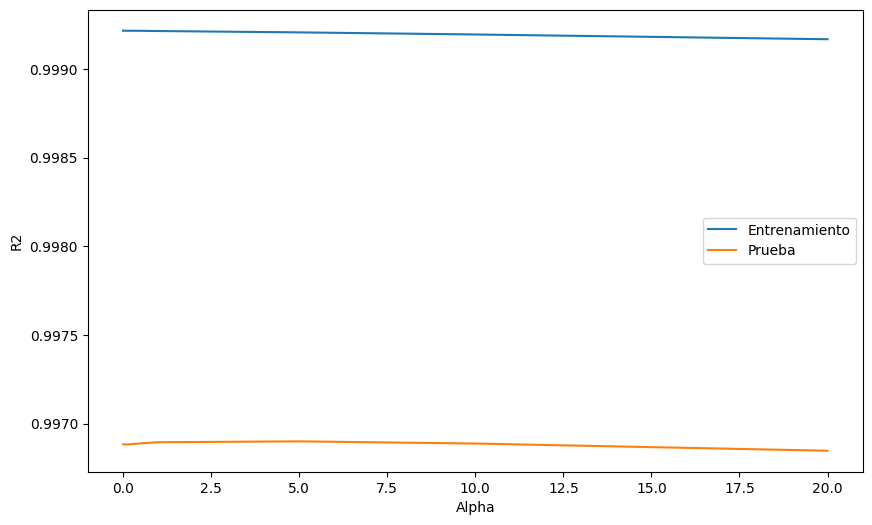

In [11]:
#Laso
#Prueba con las alphas de 0 a 20 
alphas = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]

train_r2_laso = []
test_r2_laso = []

for alpha in alphas:
    laso_modelo = Lasso(alpha=alpha)
    laso_modelo.fit(X_train, y_train)
    
    # Predecir
    y_train_pred_laso = laso_modelo.predict(X_train)
    y_test_pred_laso = laso_modelo.predict(X_test)
    
    # Calcular R2
    train_r2_laso.append(r2_score(y_train, y_train_pred_laso))
    test_r2_laso.append(r2_score(y_test, y_test_pred_laso))

# Graficar
plt.figure(figsize=(10,6))
plt.plot(alphas, train_r2_laso, label="Entrenamiento")
plt.plot(alphas, test_r2_laso, label="Prueba")
plt.xlabel("Alpha")
plt.ylabel("R2")
plt.legend()
plt.show()


In [ ]:
print(train_r2_laso.append(r2_score(y_train, y_train_pred_laso))
print(test_r2_laso.append(r2_score(y_test, y_test_pred_laso))

Alpha 0 es el valor con más exactitud pero puede tener overfitting. Los valores pueden estar entre 0 y 2.5, voy a hacer un segundo grafico centrado en esos valores

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.781e+08, tolerance: 7.097e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

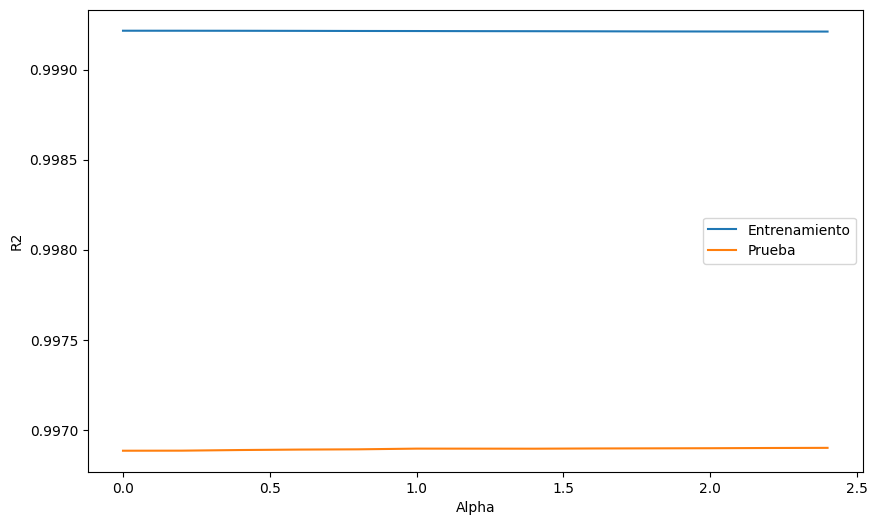

In [12]:
alphas = [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]

train_r2_laso = []
test_r2_laso = []

for alpha in alphas:
    laso_modelo = Lasso(alpha=alpha)
    laso_modelo.fit(X_train, y_train)
    
    # Predecir
    y_train_pred_laso = laso_modelo.predict(X_train)
    y_test_pred_laso = laso_modelo.predict(X_test)
    
    # Calcular R2
    train_r2_laso.append(r2_score(y_train, y_train_pred_laso))
    test_r2_laso.append(r2_score(y_test, y_test_pred_laso))

# Graficar
plt.figure(figsize=(10,6))
plt.plot(alphas, train_r2_laso, label="Entrenamiento")
plt.plot(alphas, test_r2_laso, label="Prueba")
plt.xlabel("Alpha")
plt.ylabel("R2")
plt.legend()
plt.show()


In [13]:

#Prueba laso optimizada 
alpha_values = {'alpha': [0.1, 0.5, 1, 5, 10, 20]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid=alpha_values, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Mejor hiperparámetro encontrado
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

best_lasso_model = Lasso(alpha=0.3, max_iter=5000000)
best_lasso_model.fit(X_train, y_train)

y_train_lasso = best_lasso_model.predict(X_train)
y_test_lasso = best_lasso_model.predict(X_test)

train_r2_lasso = r2_score(y_train, y_train_lasso)
test_r2_lasso = r2_score(y_test, y_test_lasso)

non_zero_coef = np.sum(best_lasso_model.coef_ != 0)
print(f"Número de variables importantes (no eliminadas): {non_zero_coef}")
print(f"Mejor R2 train (Lasso optimizado): {train_r2_lasso}")
print(f"Mejor R2 en test (Lasso optimizado): {test_r2_lasso}")
print(X_train.head())
print(X_test.head())


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+08, tolerance: 6.128e+07
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+08, tolerance: 6.052e+07
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

Mejor valor de alpha: 1


He impreso x_train y x_test, he aumentado el numero de iteraciones y he subido el valor de alpha ignorando el resultado de best_alpha poruqe me sale el siguiente anuncio: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.743e-01, tolerance: 2.238e-01
  model = cd_fast.enet_coordinate_descent      Pero no consigo arreglarlo 

In [ ]:
#Metricas Modelo Lasso
train_median_ae_lasso = median_absolute_error(y_train, y_train_lasso)
test_median_ae_lasso = median_absolute_error(y_test, y_test_lasso)

train_mape_lasso = mean_absolute_percentage_error(y_train, y_train_lasso) * 100
test_mape_lasso = mean_absolute_percentage_error(y_test, y_test_lasso) * 100

df_metrics_lasso = pd.DataFrame({
    'R2': [train_r2_lasso, test_r2_lasso, test_r2_lasso - train_r2_lasso],
    'Median AE': [train_median_ae_lasso, test_median_ae_lasso, test_median_ae_lasso - train_median_ae_lasso],
    'MAPE': [train_mape_lasso, test_mape_lasso, test_mape_lasso - train_mape_lasso]
}, index=['Train set', 'Test set', 'Diferencia'])

print("Métricas para el modelo Lasso:")
print(df_metrics_lasso)



Métricas para el modelo Lasso:
                  R2  Median AE       MAPE
Train set   0.930290   0.080312  47.906405
Test set    0.916965   0.087755  34.582386
Diferencia -0.013324   0.007443 -13.324019


In [ ]:
#Comparación de los dos modelos:
print("Métricas para el modelo de regresión lineal:")
print(df_metrics_linear)

print("Métricas para el modelo Lasso:")
print(df_metrics_lasso)


Métricas para el modelo de regresión lineal:


NameError: name 'df_metrics_linear' is not defined

El modelo Linear da es capaz de predecir resultados de manera más exacta.